In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### 문제 
1. csv 폴더 안에 있는 drinks.csv 파일 로드 
2. 데이터프레임의 정보를 확인하고 결측치가 존재한다면 결측치의 개수 확인 
3. 컬럼의 이름을 변경 -> [국가, 맥주소비량, 증류주소비량, 와인소비량, 소비알콜량, 대륙]
4. 대륙 컬럼에 결측치 존재 -> 결측치 'OT' 대체
5. 새로운 파생변수(총술소비량) -> 맥주소비량 + 증류주소비량 + 와인소비량
6. 새로운 파생변수(도수) -> (소비알콜량 / 총 술소비량) * 100
7. 도수 컬럼의 전체 평균을 구하고 대륙별 도수 평균이 전체 평균보다 높은 대륙을 출력

In [2]:
drinks = pd.read_csv("../../csv/drinks.csv")

In [3]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [4]:
drinks.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [5]:
drinks.columns = ['국가', '맥주소비량', '증류주소비량', '와인소비량', 
                  '소비알콜량', '대륙']

In [6]:
drinks.head(1)

,국가,맥주소비량,증류주소비량,와인소비량,소비알콜량,대륙
0,Afghanistan,0,0,0,0.0,AS


In [7]:
# 대륙 컬럼의 결측치를 OT 대체
drinks['대륙'].fillna('OT', inplace=True)
# drinks['대륙'] = drinks['대륙'].fillna('OT')
# Series 전체의 데이터에서 fillna() 함수를 호출하면 
# inplace = True를 이용해서 원본의 데이터 수정이 가능

In [8]:
drinks['대륙'].value_counts()

대륙
AF    53
EU    45
AS    44
OT    23
OC    16
SA    12
Name: count, dtype: int64

In [9]:
drinks.isna().sum()

국가        0
맥주소비량     0
증류주소비량    0
와인소비량     0
소비알콜량     0
대륙        0
dtype: int64

In [10]:
# 파생변수 생성 
# 총 술소비량 -> 맥주소비량 + 증류주소비량 + 와인소비량
drinks['총 술소비량'] = \
    drinks['맥주소비량'] + drinks['증류주소비량'] + drinks['와인소비량']

In [11]:
# 맥주소비량부터 와인소비량까지 필터 -> 합산 함수 사용
drinks.loc[:, '맥주소비량' : '와인소비량'].sum(axis=1)

0        0
1      275
2       39
3      695
4      319
      ... 
188    436
189    114
190      6
191     55
192     86
Length: 193, dtype: int64

In [12]:
# 도수 파생변수 생성 
drinks['도수'] = (drinks['소비알콜량'] / drinks['총 술소비량']) * 100

In [13]:
drinks.head()

,국가,맥주소비량,증류주소비량,와인소비량,소비알콜량,대륙,총 술소비량,도수
0,Afghanistan,0,0,0,0.0,AS,0,NaN
1,Albania,89,132,54,4.9,EU,275,1.781818
2,Algeria,25,0,14,0.7,AF,39,1.794872
3,Andorra,245,138,312,12.4,EU,695,1.784173
4,Angola,217,57,45,5.9,AF,319,1.849530


In [14]:
drinks['도수'].isna().sum()

13

In [15]:
# 도수 컬럼의 데이터가 결측치인 데이터를 확인 
# 인덱스의 조건식 -> 도수 컬럼의 데이터중 결측치인
flag = drinks['도수'].isna()

drinks.loc[flag, ]

,국가,맥주소비량,증류주소비량,와인소비량,소비알콜량,대륙,총 술소비량,도수
0,Afghanistan,0,0,0,0.0,AS,0,NaN
13,Bangladesh,0,0,0,0.0,AS,0,NaN
46,North Korea,0,0,0,0.0,AS,0,NaN
79,Iran,0,0,0,0.0,AS,0,NaN
90,Kuwait,0,0,0,0.0,AS,0,NaN
97,Libya,0,0,0,0.0,AF,0,NaN
103,Maldives,0,0,0,0.0,AS,0,NaN
106,Marshall Islands,0,0,0,0.0,OC,0,NaN
107,Mauritania,0,0,0,0.0,AF,0,NaN
111,Monaco,0,0,0,0.0,EU,0,NaN


In [16]:
# 결측치응 그대로 둔 상태에서 도수의 평균 : 결측치를 제외하고 평균
mean_data = drinks['도수'].mean()

In [17]:
# 대륙별로 그룹화 -> 도수의 평균을 그룹화 연산
group_data = drinks.groupby('대륙')['도수'].mean()

In [18]:
group_data[group_data > mean_data]

대륙
AF    5.272516
Name: 도수, dtype: float64

In [19]:
# 도수의 결측치를 0으로 대체하고 평균 도수를 생성
# 대륙별 그룹화 
drinks['도수'].fillna(0, inplace=True)

In [20]:
drinks['도수'].isna().sum()

0

In [21]:
mean_data2 = drinks['도수'].mean()

In [ ]:
group_data2 = drinks.groupby('대륙')['도수'].mean()

In [23]:
group_data2[group_data2 > mean_data2]

대륙
AF    4.974072
Name: 도수, dtype: float64

In [24]:
# 대륙이 AF인 데이터를 확인 
flag = drinks['대륙'] == 'AF'

drinks.loc[flag, ]

,국가,맥주소비량,증류주소비량,와인소비량,소비알콜량,대륙,총 술소비량,도수
2,Algeria,25,0,14,0.7,AF,39,1.794872
4,Angola,217,57,45,5.9,AF,319,1.849530
18,Benin,34,4,13,1.1,AF,51,2.156863
22,Botswana,173,35,35,5.4,AF,243,2.222222
26,Burkina Faso,25,7,7,4.3,AF,39,11.025641
27,Burundi,88,0,0,6.3,AF,88,7.159091
28,Cote d'Ivoire,37,1,7,4.0,AF,45,8.888889
29,Cabo Verde,144,56,16,4.0,AF,216,1.851852
31,Cameroon,147,1,4,5.8,AF,152,3.815789
33,Central African Republic,17,2,1,1.8,AF,20,9.000000


- 총 술소비량을 기준으로 우리나라는 몇위인가?
    1. 총 술소비량을 기준으로 내림차순 정렬
    2. 인덱스를 초기화하고 기존의 인덱스는 제거 
    3. 국가 컬럼의 데이터가 South Korea인 데이터를 확인
    4. 해당 데이터에서 index+1값이 순위
    5. 총 술소비량이 0인 데이터는 제외하고 나머지 데이터를 기준으로 막대그래프 생성
    6. South Korea의 막대를 선택해서 막대의 색상을 변경하고 주석을 추가 

In [25]:
# 총 소비량을 기준으로 내림차순 정렬 
drinks.sort_values(['총 술소비량'], ascending=False, inplace=True)

In [26]:
# 인덱스를 초기화하고 기존의 인덱스는 제거 
drinks.reset_index(drop=True, inplace = True)

In [27]:
# South Korea의 데이터를 확인 
flag = drinks['국가'] == 'South Korea'

In [28]:
# south korea의 인덱스값을 저장
korea_idx = drinks.loc[flag, ].index[0]

In [29]:
korea_value = drinks.loc[korea_idx, '총 술소비량']

In [30]:
# 총 술소비량이 0인 데이터는 제외
# 총 술소비량이 0인 아닌 데이터만 추출
flag = drinks['총 술소비량'] != 0

drinks = drinks.loc[flag, ]

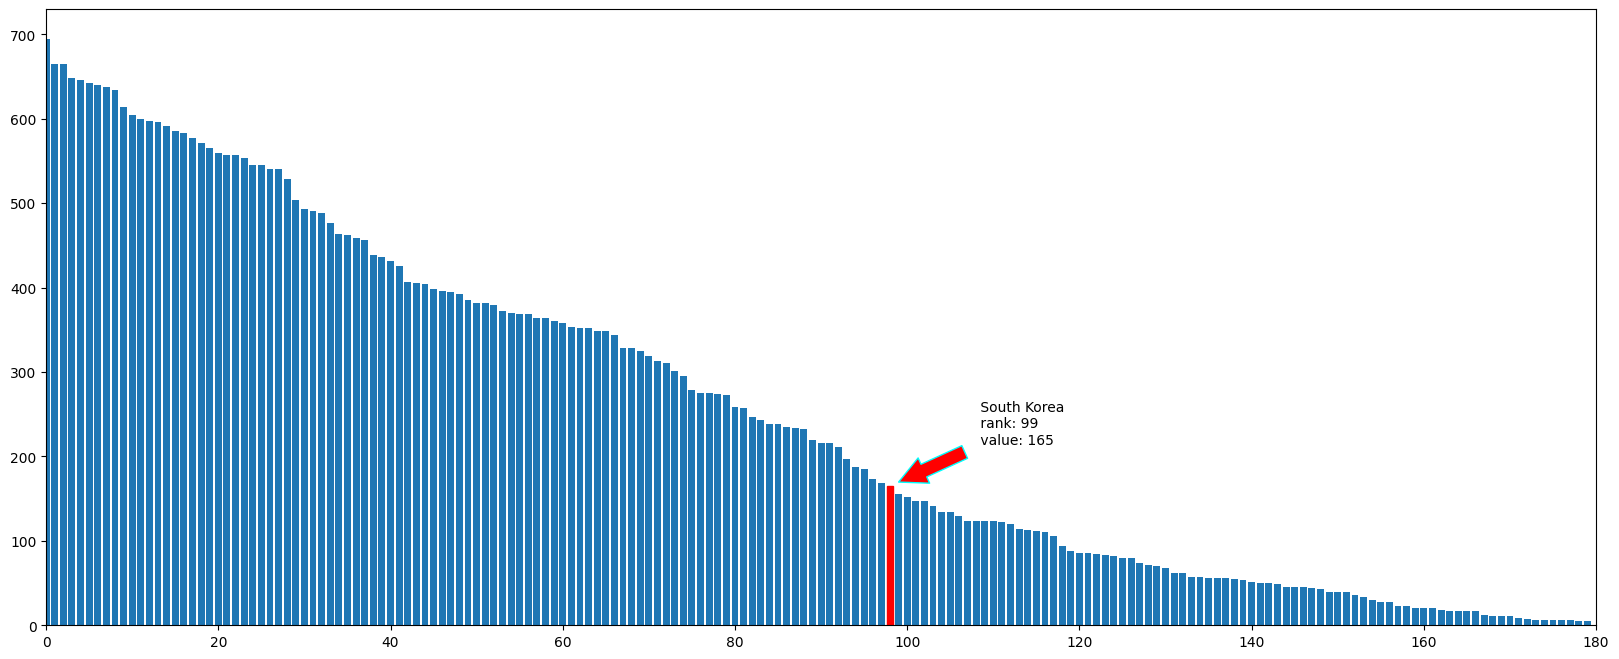

In [31]:
# 막대 그래프를 생성 
# x축 : drinks의 index의 값
# y축 : drinks의 총 술소비량

x = drinks.index
y = drinks['총 술소비량']

# 그래프가 그려지는 공간의 크기를 조절
plt.figure(figsize=(20, 8))
# 막대 그래프 생성 
bar_list = plt.bar(x, y)

# korea_idx의 위치에 있는 막대를 선택해서 색상을 빨간색으로 변경 
bar_list[korea_idx].set_color('r')

# 주석을 추가 
plt.annotate(
    f" South Korea \n rank: {korea_idx+1} \n value: {korea_value}", 
    xy = (korea_idx, korea_value),      # 주석의 위치
    xytext = (korea_idx + 10, korea_value + 50),    # 주석의 텍스트 위치
    arrowprops= {
        'facecolor' : 'r',      # 화살표 내부의 색상 설정
        'edgecolor' : 'cyan',   # 화살표 테두리 색상 설정
        'headwidth' : 20,       # 화살표 머리 너비를 지정
        'headlength' : 20,      # 화살표 머리 길이를 지정
        'width' : 10,           # 화살표 꼬리 너비를 지정
        'shrink' : 0.1          # 화살표와 주석 문자의 거리 
    }
)
# x축의 범위를 지정 
plt.xlim(0, 180)

plt.show()

- 도수 컬럼을 기준으로 한국은 몇위인가?
    1. 도수 컬럼을 기준으로 내림차순 정렬 
    2. 인덱스를 초기화하고 기존의 인덱스는 제거 
    3. 국가가 South Korea인 데이터에서 index값 변수에 저장 
    4. 국가가 South Korea인 데이터에서 도수의 값을 변수에 저장
    5. 막대 그래프를 생성 (x축 데이터 : index, y축 데이터 : 도수)
    6. 해당하는 막대 그래프에서 한국의 막대를 선택하여 색상을 빨간색으로 변경
    7. 주석을 추가 

In [33]:
# 도수 컬럼을 기준으로 내림차순 정렬 
drinks.sort_values(['도수'], ascending=False, inplace=True)

In [40]:
# 인덱스를 초기화하고 기존 인덱스는 제거 
drinks.reset_index(drop=True, inplace=True)

In [43]:
# 국가가 한국인 데이터의 인덱스를 저장 
flag = drinks['국가'] == 'South Korea'
korea_idx2 = drinks.loc[flag, ].index[0]

In [46]:
# 한국의 도수 데이터를 저장 
korea_value2 = drinks.loc[korea_idx2, '도수']

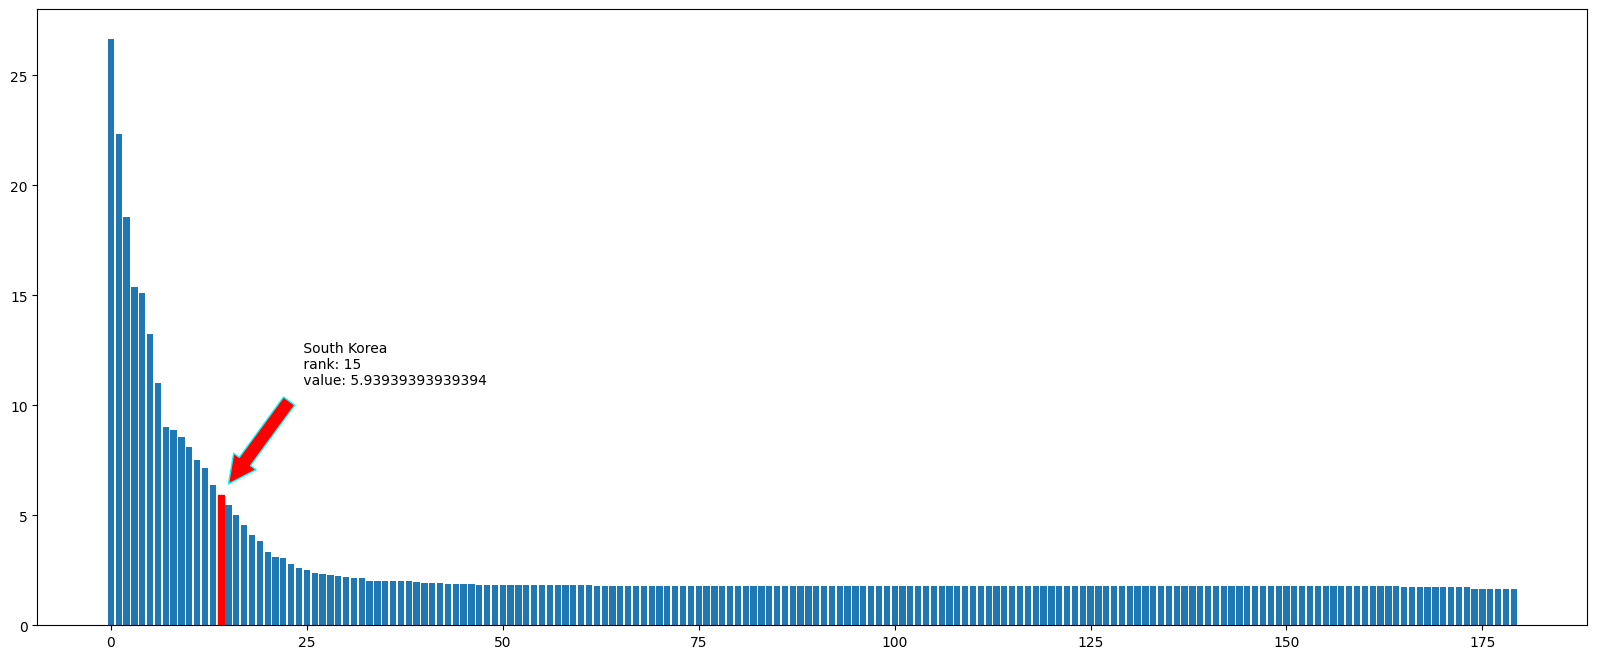

In [51]:
# 막대 그래프 생성 

x2 = drinks.index
y2 = drinks['도수']

# 그래프의 사이즈를 변경 
plt.figure(figsize=(20, 8))
# 막대그래프 생성
bar_list2 = plt.bar(x2, y2)

# korea_idx2 위치의 막대를 선택하여 색상 변경
bar_list2[korea_idx2].set_color('r')

# 주석을 추가 
plt.annotate(
    f" South Korea \n rank: {korea_idx2+1} \n value: {korea_value2}", 
    xy = (korea_idx2, korea_value2),      # 주석의 위치
    xytext = (korea_idx2 + 10, korea_value2 + 5),    # 주석의 텍스트 위치
    arrowprops= {
        'facecolor' : 'r',      # 화살표 내부의 색상 설정
        'edgecolor' : 'cyan',   # 화살표 테두리 색상 설정
        'headwidth' : 20,       # 화살표 머리 너비를 지정
        'headlength' : 20,      # 화살표 머리 길이를 지정
        'width' : 10,           # 화살표 꼬리 너비를 지정
        'shrink' : 0.1          # 화살표와 주석 문자의 거리 
    }
)

plt.show()